<a href="https://colab.research.google.com/github/Gennifer2001/tesis/blob/main/T%C3%A9sisjeje2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_**OLA BIENVENIDA**_

In [1]:
!pip install ete3
import ete3
from ete3 import Tree
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster import hierarchy
import networkx,pylab
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.spatial.distance import pdist,squareform
import random
from IPython.display import display, Latex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273785 sha256=d7dbd94a317d569e69a0aa129c9495f63c974f2afe0f8076a3f7e16923caa20b
  Stored in directory: /root/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3


In [3]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/psyco.csv'
df = pd.read_csv(url)
df['age'] = df['age'].replace("Dec-18", "12-18", regex=True)
df.head(8)

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,12-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN
5,19-25,Male,Student in College,NaN,5,7,0.5,4,4,-1.0,...,-0.5,0.0,0.0,110,1100,Complete Physical Attendance,No,NaN,5,NaN
6,19-25,Male,Student in College,NaN,5,4,0.5,1,3,0.5,...,0.5,1.0,1.0,1100,1101,Work/study from home,Yes,NaN,5,NaN
7,19-25,Male,Student in College,NaN,7,9,0.5,3,2,0.0,...,-1.0,-0.5,0.0,1000,1000,Complete Physical Attendance,Yes,NaN,7,NaN


Eliminaremos todos las variables no numericas y las que no nos aportan información

In [4]:
df1 = df.drop(['age','gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
nombres =['time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
df1

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1171,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1172,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0
1173,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


In [5]:
df2 = df.drop(['gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)

In [7]:
seed = 42
np.random.seed(seed)
dfprueba = df2.sample(n=100)

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfprueba.drop(["age"],axis=1))

In [9]:
dfprueba.reset_index(drop=True,inplace=True)
ndf = pd.DataFrame(df_scaled, columns = [nombres])
ndf.loc[:,'age'] = dfprueba['age']
column_order = ['age','time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
ndf = ndf[column_order]
ndf

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,40-50,2.199251,1.468365,0.707311,0.249136,-0.657596,-0.703303,-0.575758,-1.962135,-1.921654,-1.608704,-1.069045
1,26-32,0.726538,-0.344431,-0.679573,-1.411773,-1.479591,1.694320,1.696970,1.254480,1.001014,1.412337,1.603567
2,19-25,-0.255270,-1.432109,0.707311,-1.411773,-1.479591,1.694320,1.696970,1.254480,1.001014,1.412337,1.603567
3,19-25,-0.255270,-1.432109,-0.679573,0.249136,0.986394,-0.703303,-1.333333,0.450326,0.270347,-0.853444,0.712697
4,12-18,-0.255270,-1.432109,-0.679573,1.079591,1.808389,-0.703303,0.181818,-0.353828,0.270347,-0.098184,0.712697
...,...,...,...,...,...,...,...,...,...,...,...,...
95,60+,0.726538,-1.069550,0.707311,1.079591,0.164399,-1.502510,1.696970,1.254480,1.001014,1.412337,1.603567
96,19-25,1.708347,1.468365,2.787637,0.249136,0.986394,0.895112,-1.333333,-0.353828,-1.190987,-1.608704,-1.069045
97,33-40,1.708347,1.105806,2.094195,1.079591,0.986394,0.095905,0.181818,-0.353828,-1.921654,-0.098184,-1.959916
98,12-18,-1.237079,-1.432109,-0.679573,0.249136,0.164399,0.095905,-0.575758,0.450326,1.001014,-0.098184,0.712697


In [ ]:
#Para poner convertir age en cadena de texto
ndf['age'] = ndf['age'].astype(str, errors='raise')

In [ ]:
edades1 = dfprueba[dfprueba['age']=='12-18']
#n = len(edades1)
edades1

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
18,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
43,12-18,9,7,0.5,3,2,-0.5,0.5,1.0,1.0,-0.5,0.0
46,12-18,9,12,0.5,3,2,0.0,0.5,0.0,0.5,0.0,-0.5
79,12-18,4,9,0.5,1,2,-1.0,-1.0,1.0,-0.5,0.5,0.5
84,12-18,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5
98,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5


In [ ]:
edades2 = dfprueba[dfprueba['age']=='19-25']
#n = len(edades1)
edades2

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
2,19-25,7,4,1.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5
7,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
14,19-25,9,7,0.5,5,3,0.5,0.5,1.0,1.0,1.0,0.5
20,19-25,9,9,0.5,4,2,-0.5,-0.5,1.0,0.0,-0.5,0.5
24,19-25,5,5,0.5,1,3,0.0,0.0,0.5,0.5,-0.5,0.5
26,19-25,5,4,0.5,2,3,0.0,-0.5,0.0,0.0,0.0,0.0
35,19-25,5,9,0.5,3,3,0.0,0.0,0.0,0.0,0.0,0.0
36,19-25,12,7,0.5,3,4,-0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
edades3 = dfprueba[dfprueba['age']=='26-32']
#n = len(edades1)
edades3

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
10,26-32,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5
28,26-32,11,12,0.5,3,3,0.0,0.0,-1.0,-1.0,0.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
47,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
51,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
53,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
57,26-32,7,7,1.5,3,3,0.0,0.0,0.0,0.5,0.0,0.0
58,26-32,5,5,0.5,3,4,-0.5,-1.0,0.5,0.0,0.0,0.0


In [ ]:
edades4 = dfprueba[dfprueba['age']=='33-40']
#n = len(edades1)
edades4

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
30,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
34,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
39,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
91,33-40,9,11,0.5,4,3,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0


In [ ]:
edades5 = dfprueba[dfprueba['age']=='40-50']
#n = len(edades1)
edades5

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
5,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
6,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
16,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
21,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
22,40-50,7,7,0.5,2,3,1.0,0.0,0.0,0.5,0.5,0.0
27,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
40,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
55,40-50,7,9,0.5,3,3,0.0,-0.5,0.5,1.0,0.5,-0.5


In [ ]:
edades6 = dfprueba[dfprueba['age']=='50-60']
#n = len(edades1)
edades6

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17,50-60,9,11,1.5,3,2,0.0,-0.5,0.5,0.0,0.0,0.0
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
32,50-60,12,12,2.5,3,3,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
75,50-60,7,5,0.5,3,2,-0.5,-0.5,0.5,-0.5,-0.5,0.5
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
89,50-60,5,12,0.5,1,2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5


In [ ]:
edades7 = dfprueba[dfprueba['age']=='60+']
#n = len(edades1)
edades7

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
print(ndf['age'])


      age
0   40-50
1   26-32
2   19-25
3   19-25
4   12-18
..    ...
95    60+
96  19-25
97  33-40
98  12-18
99  19-25

[100 rows x 1 columns]


In [ ]:
categorias_unicas = df['age'].unique() #saca las categorias
print(categorias_unicas)

edades = ['edad1','edad2','edad3','edad4','edad5','edad6','edad7']
dic_edades=dict(zip(edades,categorias_unicas))
j=0
for i in categorias_unicas:
  edades[j]=ndf[ndf['age']==i]

['19-25' '12-18' '33-40' '60+' '26-32' '40-50' '50-60']


In [ ]:
#dendo= linkage(Valores,'ward')
dendo=linkage(df_scaled, 'ward')

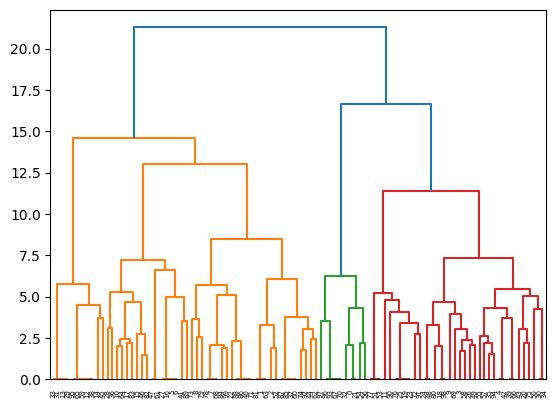

In [ ]:
dendograma = sch.dendrogram(dendo)

Función para volver un dendograma en formato netwick

In [ ]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

In [ ]:
#leaf_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]
leaf_names = range(0, 100)
#Z = hierarchy.linkage([Valores], "ward")
tree1 = hierarchy.to_tree(dendo, False)

newick_tree1 = get_newick(tree1, tree1.dist, leaf_names)

print(newick_tree1)


((((((((34:0.00,30:0.00):4.27,50:4.27):0.80,((75:2.22,20:2.22):0.83,43:3.06):2.01):0.39,(((66:0.00,39:0.00):3.68,(42:0.00,4:0.00):3.68):0.63,(((94:1.53,35:1.53):0.65,57:2.18):0.45,55:2.63):1.68):1.15):1.90,(((((49:2.08,26:2.08):0.29,(58:1.73,3:1.73):0.64):0.68,69:3.06):0.86,9:3.92):0.74,(((98:0.00,18:0.00):2.00,80:2.00):1.26,(48:0.00,24:0.00):3.26):1.40):2.70):4.02,(((((91:2.75,72:2.75):0.63,(((23:0.00,19:0.00):0.00,25:0.00):0.00,76:0.00):3.38):0.69,90:4.07):0.71,11:4.78):0.44,((53:0.00,51:0.00):0.00,77:0.00):5.22):6.16):5.24,(((56:2.20,54:2.20):2.13,((21:0.00,0:0.00):2.06,32:2.06):2.27):1.89,((((70:0.00,67:0.00):0.00,93:0.00):0.00,96:0.00):3.54,97:3.54):2.68):10.41):4.66,(((((((62:2.43,44:2.43):0.62,(92:1.79,74:1.79):1.27):0.71,(((60:0.00,37:0.00):0.00,85:0.00):0.00,87:0.00):3.77):2.32,((52:1.89,2:1.89):1.42,((63:0.00,1:0.00):0.00,81:0.00):3.31):2.78):2.42,((((((71:0.00,40:0.00):0.00,86:0.00):0.00,88:0.00):2.31,22:2.31):2.81,((99:1.88,84:1.88):0.19,((68:0.00,7:0.00):0.00,78:0.00):2.07

In [ ]:
tree = ete3.Tree(newick_tree1)
print(tree)


                        /-34
                     /-|
                  /-|   \-30
                 |  |
                 |   \-50
               /-|
              |  |      /-75
              |  |   /-|
              |   \-|   \-20
              |     |
              |      \-43
              |
            /-|         /-66
           |  |      /-|
           |  |     |   \-39
           |  |   /-|
           |  |  |  |   /-42
           |  |  |   \-|
           |  |  |      \-4
           |   \-|
           |     |         /-94
           |     |      /-|
           |     |   /-|   \-35
           |     |  |  |
           |      \-|   \-57
         /-|        |
        |  |         \-55
        |  |
        |  |               /-49
        |  |            /-|
        |  |           |   \-26
        |  |         /-|
        |  |        |  |   /-58
        |  |      /-|   \-|
        |  |     |  |      \-3
        |  |   /-|  |
        |  |  |  |   \-69
        |  |  |  |
        |  |  

In [ ]:
from ete3 import Tree

def asignar_nombres(arbol):
    # Asignar nombres a los nodos si no tienen uno
    for i, nodo in enumerate(arbol.traverse()):
        if not nodo.name:
            nodo.name = f"Nodo_{i}"

def obtener_subarboles(arbol):
    subarboles = []

    for nodo in arbol.traverse():
        # Buscar nodos descendientes del nodo actual
        nodos_descendientes = arbol.search_nodes(name=nodo.name, order=1)

        # Construir un nuevo árbol con el nodo como raíz y sus descendientes
        subarbol = Tree()
        subarbol.add_child(nodo.copy())

        for descendiente in nodos_descendientes:
            subarbol.add_child(descendiente.copy())

        subarboles.append(subarbol)

    return subarboles

# Función para obtener la representación en formato de texto de un subárbol
def obtener_texto(subarbol):
    return subarbol.write(format=9)

# Ejemplo de uso
#arbol_ejemplo = Tree("((A,B),C,D);")
asignar_nombres(tree)
todos_subarboles = obtener_subarboles(tree)

# Imprimir la representación en formato de texto de cada subárbol
#for i, subarbol in enumerate(todos_subarboles):
 #   print(f"Subárbol {i + 1} - Representación en formato de texto:")
  #  print(obtener_texto(subarbol))
   # print("\n")


In [ ]:
#for subarbol in todos_subarboles:
 #   print(subarbol)

In [ ]:
#for n in range(1,11):
 # for subarbol in todos_subarboles:
  #  if len(subarbol) <= n:
   #   n_subarbol = [subarbol]

In [ ]:
n_subarboles = []

for n in range(1, 101):
    n_subarbol = []  # Inicializar la lista para cada valor de n
    for subarbol in todos_subarboles:
        if len(subarbol) <= n:
            n_subarbol.append(subarbol)
    n_subarboles.append((n, n_subarbol))  # Agregar la lista de n-subarboles a la lista general

# Imprimir o procesar la lista de n-subarboles
#for n, subarboles in n_subarboles:
 #   print(f"Subárboles con tamaño menor o igual a {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
   # print("\n")

In [ ]:
def es_contenido(subarbol1, subarbol2):
    """
    Verifica si subarbol1 está contenido en subarbol2.
    """
    nodos1 = set(nodo.name for nodo in subarbol1.traverse())
    nodos2 = set(nodo.name for nodo in subarbol2.traverse())

    return nodos1.issubset(nodos2)

def obtener_maximales(n_subarboles):
    """
    Obtiene los n-subarboles maximales a partir de la lista de n-subarboles.
    """
    maximales = []

    for n, subarboles in n_subarboles:
        subarboles_maximales = []

        for subarbol in subarboles:
            es_maximal = True

            # Comprobar si el subárbol está contenido en otro subárbol
            for otro_subarbol in subarboles:
                if subarbol != otro_subarbol and es_contenido(subarbol, otro_subarbol):
                   es_maximal = False
                   break

            if es_maximal:
               subarboles_maximales.append(subarbol)

        maximales.append((n, subarboles_maximales))

    return maximales

# Ejemplo de uso
maximales = obtener_maximales(n_subarboles)

# Imprimir o procesar la lista de n-subarboles maximales
#for n, subarboles in maximales:
 #   print(f"Subárboles maximales con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

In [ ]:
Sn = []

for n, subarboles in maximales:
    Sj = len(subarboles)  # Inicializamos con la cantidad de n-subárboles maximales
    for subarbol in subarboles:
        Sj *= len(subarbol)
    Sn.append((n, Sj))

# Imprimir o procesar la lista Sn
for n, s in Sn:
    print(f"S{n}:", s)



S1: 100
S2: 1133871366144
S3: 829406312792064
S4: 6255800255250432
S5: 5772902400000000
S6: 2239488000000000
S7: 938843136000000
S8: 146313216000000
S9: 88833024000000
S10: 12541132800000
S11: 662390784000
S12: 662390784000
S13: 77738918400
S14: 20406466080
S15: 20406466080
S16: 20406466080
S17: 4282838560
S18: 4282838560
S19: 4282838560
S20: 4282838560
S21: 4282838560
S22: 4282838560
S23: 4282838560
S24: 4282838560
S25: 608357750
S26: 80223000
S27: 80223000
S28: 80223000
S29: 80223000
S30: 80223000
S31: 80223000
S32: 80223000
S33: 80223000
S34: 80223000
S35: 80223000
S36: 8751600
S37: 8751600
S38: 8751600
S39: 8751600
S40: 8751600
S41: 8751600
S42: 8751600
S43: 681120
S44: 681120
S45: 681120
S46: 65274
S47: 65274
S48: 65274
S49: 65274
S50: 65274
S51: 65274
S52: 65274
S53: 65274
S54: 4968
S55: 4968
S56: 4968
S57: 4968
S58: 4968
S59: 4968
S60: 4968
S61: 4968
S62: 4968
S63: 4968
S64: 4968
S65: 4968
S66: 4968
S67: 4968
S68: 4968
S69: 4968
S70: 4968
S71: 4968
S72: 4968
S73: 4968
S74: 4968


In [ ]:
maximo_valor = max(Sn, key=lambda x: x[1])

# Imprimir o procesar el resultado
print(f"Valor máximo en Sn: {maximo_valor}")


k = maximo_valor[0]
print(f"El valor de n es {k}")

Valor máximo en Sn: (4, 6255800255250432)
El valor de n es 4


In [ ]:
n_subarboles_maximales = None

for n, subarboles in maximales:
    if n == k:
        n_subarboles_maximales = subarboles
        break

# Ahora puedes trabajar con la lista de 4-subárboles maximales
for subarbol in n_subarboles_maximales:
    print(subarbol)


            /-29
         /-|
      /-|   \-13
     |  |
-- /-|   \-31
     |
      \-33

         /-53
      /-|
-- /-|   \-51
     |
      \-77

      /-56
-- /-|
      \-54

         /-21
      /-|
-- /-|   \-0
     |
      \-32

            /-70
         /-|
      /-|   \-67
     |  |
-- /-|   \-93
     |
      \-96

-- /-97

      /-45
-- /-|
      \-14

-- /-11

         /-79
      /-|
-- /-|   \-8
     |
      \-73

      /-61
-- /-|
      \-47

      /-36
-- /-|
      \-28

            /-38
         /-|
      /-|   \-12
     |  |
-- /-|   \-59
     |
      \-65

-- /-95

         /-34
      /-|
-- /-|   \-30
     |
      \-50

         /-75
      /-|
-- /-|   \-20
     |
      \-43

         /-66
      /-|
     |   \-39
-- /-|
     |   /-42
      \-|
         \-4

            /-94
         /-|
      /-|   \-35
     |  |
-- /-|   \-57
     |
      \-55

-- /-9

         /-98
      /-|
-- /-|   \-18
     |
      \-80

      /-48
-- /-|
      \-24

-- /-90

         /-62
      /-

In [ ]:
Base =[]

for subarbol in n_subarboles_maximales:
  y = []
  for node in subarbol.traverse():
    if node.is_leaf():
      elem = node.name
      y.append(elem)
  Base.append(y)
display(f"El valor de n es {k}, y asi, obtenemos la base topológica B_{k}")
Base

'El valor de n es 4, y asi, obtenemos la base topológica B_4'

[['33', '31', '29', '13'],
 ['77', '53', '51'],
 ['56', '54'],
 ['32', '21', '0'],
 ['96', '93', '70', '67'],
 ['97'],
 ['45', '14'],
 ['11'],
 ['73', '79', '8'],
 ['61', '47'],
 ['36', '28'],
 ['65', '59', '38', '12'],
 ['95'],
 ['50', '34', '30'],
 ['43', '75', '20'],
 ['66', '39', '42', '4'],
 ['55', '57', '94', '35'],
 ['9'],
 ['80', '98', '18'],
 ['48', '24'],
 ['90'],
 ['62', '44', '92', '74'],
 ['87', '85', '60', '37'],
 ['52', '2'],
 ['81', '63', '1'],
 ['89', '41'],
 ['27', '16', '6', '5'],
 ['15', '82', '46'],
 ['83', '17', '64', '10'],
 ['49', '26', '58', '3'],
 ['69'],
 ['91', '72'],
 ['76', '25', '23', '19'],
 ['88', '86', '71', '40'],
 ['22'],
 ['99', '84'],
 ['78', '68', '7']]